# 🌿 Green Potential Analysis Notebook

This notebook replicates the functionality of `greenPotential.py` but is adapted for interactive exploration in Jupyter.

You can:
- Create or plot **green potential maps** for Antwerp or custom areas
- Choose your operation from a dropdown menu (no command line needed)
- Inspect logs and outputs interactively

---

In [1]:
import logging
import os
for k in ["PROJ_LIB", "PROJ_DATA", "GDAL_DATA", "PYPROJ_GLOBAL_CONTEXT"]:
    os.environ.pop(k, None)
# --- point to the correct data dirs of your env (/home/jovyan/conda/urbanair) ---
proj_dir = "/home/jovyan/conda/urbanair/share/proj"
gdal_dir = "/home/jovyan/conda/urbanair/share/gdal"
os.environ["PROJ_LIB"] = proj_dir
os.environ["GDAL_DATA"] = gdal_dir
from pyproj import datadir
datadir.set_data_dir(proj_dir)   # ensures pyproj uses this proj.db
import rasterio
from pathlib import Path
from src.plots_jupyter import plot_green_potential
from src.green_pont import (
        load_json_with_comments,
        antwerp_green_map,
        create_green_map,
        plot_green_map,
        create_special_green_map,
    )
import ipywidgets as widgets
from IPython.display import display

CONFIG_FILE = 'etc/settings_greenPotential.json'
cf = load_json_with_comments(CONFIG_FILE)

# Define sliders
slider1 = widgets.FloatSlider(
    value=1, min=0, max=2, step=0.01,
    description='Air quality:', continuous_update=True
)
slider2 = widgets.FloatSlider(
    value=1, min=0, max=2, step=0.01,
    description='Wind Comfort:', continuous_update=True
)
slider3 = widgets.FloatSlider(
    value=1, min=0, max=2, step=0.01,
    description='Heat stress:', continuous_update=True
)

# Display all three
display(slider1, slider2, slider3)


FloatSlider(value=1.0, description='Air quality:', max=2.0, step=0.01)

FloatSlider(value=1.0, description='Wind Comfort:', max=2.0, step=0.01)

FloatSlider(value=1.0, description='Heat stress:', max=2.0, step=0.01)

In [6]:
print(slider1.value, slider2.value, slider3.value)
create_green_map(cf, method=3, aq_weight=slider1.value, comfort_weight=slider2.value, heat_weight=slider3.value)


2.0 0.0 0.0
{'0': 1, '1': 2, '2': 3, '3': 4}
SAve file at:data/maps/recomendation_method3.tif
✅ Reprojected GeoTIFF saved at: data/maps/recomendation_method3_4326.tif
SAve file at:data/maps/recomendation_method3_aq.tif
SAve file at:data/maps/recomendation_method3_comfort.tif
SAve file at:data/maps/recomendation_method3_wbgt.tif


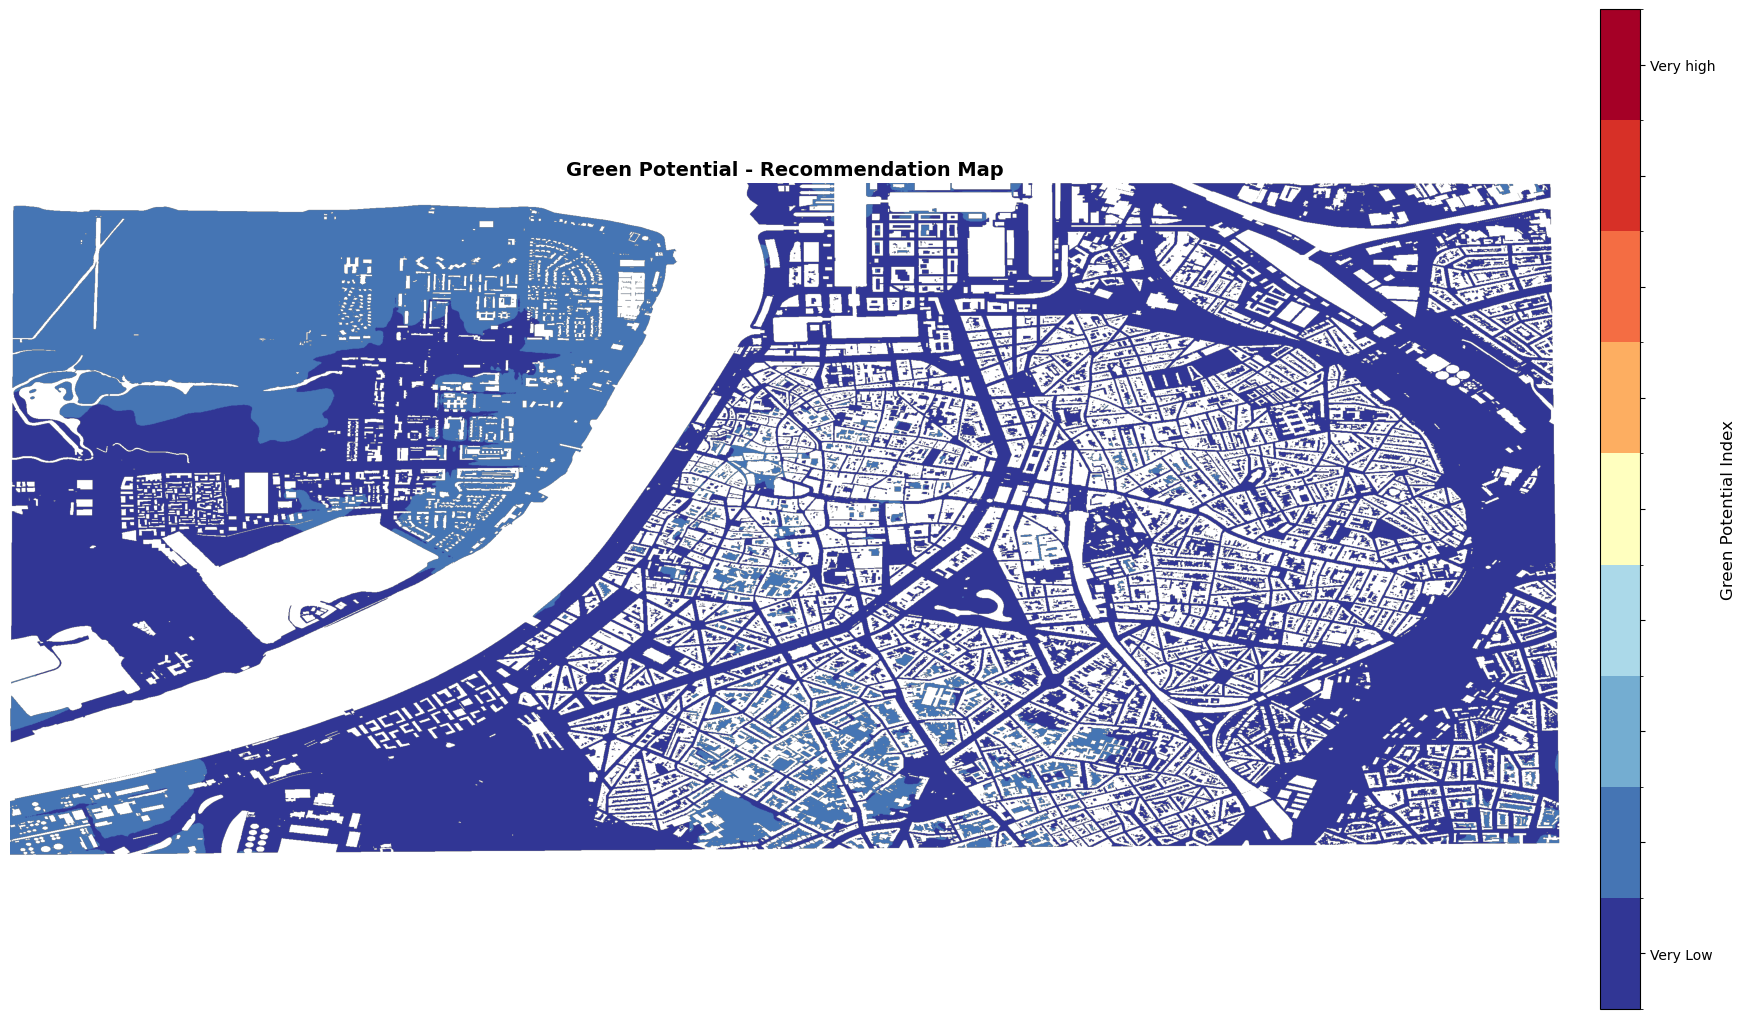

In [7]:
plot_green_potential(cf,static=True)

---

✅ **Usage:**
1. Ensure `src/green_pont.py` and `etc/settings_greenPotential.json` exist.
2. Run the notebook cells in order.
3. Use the dropdown to select a mode (e.g., `create_green_map`).
4. Click **Run** to execute.

Logs and results will appear below the button.